# 서울시 5대 범죄 (경찰서별)
 - 참고 블로그 : http://pinkwink.kr

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import platform
from matplotlib import font_manager, rc

In [2]:
%matplotlib inline

In [3]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [4]:
df = pd.read_csv("data/관서별5대.csv", encoding='cp949')
df.head()

,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거)
0,계,"126,401","82,680",163,156,276,257,"5,449","5,069","55,307","21,842","65,206","55,356"
1,중부서,"2,860","1,716",2,2,3,2,105,65,"1,395",477,"1,355","1,170"
2,종로서,"2,472","1,589",3,3,6,5,115,98,"1,070",413,"1,278","1,070"
3,남대문서,"2,094","1,226",1,0,6,4,65,46,"1,153",382,869,794
4,서대문서,"4,029","2,579",2,2,5,4,154,124,"1,812",738,"2,056","1,711"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 13 columns):
관서명       32 non-null object
소계(발생)    32 non-null object
소계(검거)    32 non-null object
살인(발생)    32 non-null int64
살인(검거)    32 non-null int64
강도(발생)    32 non-null int64
강도(검거)    32 non-null int64
강간(발생)    32 non-null object
강간(검거)    32 non-null object
절도(발생)    32 non-null object
절도(검거)    32 non-null object
폭력(발생)    32 non-null object
폭력(검거)    32 non-null object
dtypes: int64(4), object(9)
memory usage: 3.5+ KB


 - 숫자 데이터 이지만 글자로 표현된 것들이 많다. 

In [6]:
object_list = []
for i in df.columns.difference(['관서명']):
    if df[i].dtype =='object':
        object_list.append(i)
    
df[object_list] = df[object_list].apply(lambda x:x.str.replace(',',''))    
df[object_list] = df[object_list].astype(int)

In [7]:
df.head()

,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거)
0,계,126401,82680,163,156,276,257,5449,5069,55307,21842,65206,55356
1,중부서,2860,1716,2,2,3,2,105,65,1395,477,1355,1170
2,종로서,2472,1589,3,3,6,5,115,98,1070,413,1278,1070
3,남대문서,2094,1226,1,0,6,4,65,46,1153,382,869,794
4,서대문서,4029,2579,2,2,5,4,154,124,1812,738,2056,1711


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 13 columns):
관서명       32 non-null object
소계(발생)    32 non-null int32
소계(검거)    32 non-null int32
살인(발생)    32 non-null int64
살인(검거)    32 non-null int64
강도(발생)    32 non-null int64
강도(검거)    32 non-null int64
강간(발생)    32 non-null int32
강간(검거)    32 non-null int32
절도(발생)    32 non-null int32
절도(검거)    32 non-null int32
폭력(발생)    32 non-null int32
폭력(검거)    32 non-null int32
dtypes: int32(8), int64(4), object(1)
memory usage: 2.5+ KB


 - 경찰서 to 구 

In [9]:
# 경찰서 to 구.
SeoulGu_name = {'서대문서': '서대문구', '수서서': '강남구', '강서서': '강서구', '서초서': '서초구',
                '서부서': '은평구', '중부서': '중구', '종로서': '종로구', '남대문서': '중구',
                '혜화서': '종로구', '용산서': '용산구', '성북서': '성북구', '동대문서': '동대문구',
                '마포서': '마포구', '영등포서': '영등포구', '성동서': '성동구', '동작서': '동작구',
                '광진서': '광진구', '강북서': '강북구', '금천서': '금천구', '중랑서': '중랑구',
                '강남서': '강남구', '관악서': '관악구', '강동서': '강동구', '종암서': '성북구', 
                '구로서': '구로구', '양천서': '양천구', '송파서': '송파구', '노원서': '노원구', 
                '방배서': '서초구', '은평서': '은평구', '도봉서': '도봉구'}
df['구별'] = df['관서명'].map(SeoulGu_name)

In [10]:
df.head()

,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),구별
0,계,126401,82680,163,156,276,257,5449,5069,55307,21842,65206,55356,NaN
1,중부서,2860,1716,2,2,3,2,105,65,1395,477,1355,1170,중구
2,종로서,2472,1589,3,3,6,5,115,98,1070,413,1278,1070,종로구
3,남대문서,2094,1226,1,0,6,4,65,46,1153,382,869,794,중구
4,서대문서,4029,2579,2,2,5,4,154,124,1812,738,2056,1711,서대문구


In [12]:
guDF = pd.pivot_table(df,index='구별',aggfunc=np.sum)

In [13]:
guDF.head()

,강간(검거),강간(발생),강도(검거),강도(발생),살인(검거),살인(발생),소계(검거),소계(발생),절도(검거),절도(발생),폭력(검거),폭력(발생)
구별,,,,,,,,,,,,
강남구,349,449,18,21,10,13,5732,8617,1650,3850,3705,4284
강동구,123,156,8,6,3,4,3171,5244,789,2366,2248,2712
강북구,126,153,13,14,8,7,3113,4257,618,1434,2348,2649
강서구,191,262,13,13,8,7,4190,5585,1260,2096,2718,3207
관악구,221,320,14,12,8,9,3712,6345,827,2706,2642,3298


In [14]:
guDF['강간검거율'] = round(guDF['강간(검거)']/guDF['강간(발생)']*100,2)
guDF['강도검거율'] = round(guDF['강도(검거)']/guDF['강도(발생)']*100,2)
guDF['살인검거율'] = round(guDF['살인(검거)']/guDF['살인(발생)']*100,2)
guDF['절도검거율'] = round(guDF['절도(검거)']/guDF['절도(발생)']*100,2)
guDF['폭력검거율'] = round(guDF['폭력(검거)']/guDF['폭력(발생)']*100,2)

TypeError: type Series doesn't define __round__ method

In [15]:
guDF['강간검거율'] = guDF['강간(검거)']/guDF['강간(발생)']*100
guDF['강도검거율'] = guDF['강도(검거)']/guDF['강도(발생)']*100
guDF['살인검거율'] = guDF['살인(검거)']/guDF['살인(발생)']*100
guDF['절도검거율'] = guDF['절도(검거)']/guDF['절도(발생)']*100
guDF['폭력검거율'] = guDF['폭력(검거)']/guDF['폭력(발생)']*100

In [18]:
guDF['강간검거율']  = guDF['강간검거율'].round(2) 
guDF['강도검거율']  = guDF['강도검거율'].round(2) 
guDF['살인검거율']  = guDF['살인검거율'].round(2) 
guDF['절도검거율']  = guDF['절도검거율'].round(2) 
guDF['폭력검거율']  = guDF['폭력검거율'].round(2) 

In [19]:
del guDF['강간(검거)']
del guDF['강도(검거)']
del guDF['살인(검거)']
del guDF['절도(검거)']
del guDF['폭력(검거)']

 - 검거율이 100프로 넘는 부분도 있다... 이상함 ( 참고 블로그는 작년도 데이터 + 이번년 데이터라고 판단하고 100으로 만듬 )

In [20]:
guDF.head()

,강간(발생),강도(발생),살인(발생),소계(검거),소계(발생),절도(발생),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,
강남구,449,21,13,5732,8617,3850,4284,77.73,85.71,76.92,42.86,86.48
강동구,156,6,4,3171,5244,2366,2712,78.85,133.33,75.00,33.35,82.89
강북구,153,14,7,3113,4257,1434,2649,82.35,92.86,114.29,43.10,88.64
강서구,262,13,7,4190,5585,2096,3207,72.90,100.00,114.29,60.11,84.75
관악구,320,12,9,3712,6345,2706,3298,69.06,116.67,88.89,30.56,80.11


In [21]:
tmpCol = guDF.columns[guDF.columns.str.contains('율')]
tmpCol

Index(['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율'], dtype='object')

In [22]:
guDF[guDF[tmpCol]>100] = 100

In [25]:
guDF['검거율'] = guDF['소계(검거)']/guDF['소계(발생)']*100
guDF['검거율'] = guDF['검거율'].round(2)

In [26]:
guDF.rename(columns = {'강간(발생)':'강간', 
                       '강도(발생)':'강도', 
                       '살인(발생)':'살인', 
                       '절도(발생)':'절도', 
                       '폭력(발생)':'폭력'}, inplace=True)

In [27]:
del guDF['소계(발생)']
del guDF['소계(검거)']

In [28]:
guDF.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,
강남구,449,21,13,3850,4284,77.73,85.71,76.92,42.86,86.48,66.52
강동구,156,6,4,2366,2712,78.85,100.00,75.00,33.35,82.89,60.47
강북구,153,14,7,1434,2649,82.35,92.86,100.00,43.10,88.64,73.13
강서구,262,13,7,2096,3207,72.90,100.00,100.00,60.11,84.75,75.02
관악구,320,12,9,2706,3298,69.06,100.00,88.89,30.56,80.11,58.50


## 서울시 구별 인구 데이터 

In [29]:
pop_df = pd.read_csv('data/pop_kor.csv', index_col='구별')
pop_df.head()

,인구수
구별,
강남구,581760
강동구,463321
강북구,334426
강서구,595691
관악구,529031


In [30]:
guDF = guDF.join(pop_df) # Join 
guDF.sort_values(by='검거율',ascending=False)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,
강서구,262,13,7,2096,3207,72.90,100.00,100.00,60.11,84.75,75.02,595691
금천구,151,6,3,1567,2054,80.79,100.00,100.00,56.67,86.47,73.95,256167
강북구,153,14,7,1434,2649,82.35,92.86,100.00,43.10,88.64,73.13,334426
도봉구,102,9,3,1063,1487,100.00,100.00,100.00,44.97,87.63,71.32,353241
동대문구,173,13,5,1981,2548,84.39,100.00,100.00,41.09,87.40,67.90,373824
은평구,166,9,3,1914,2653,84.94,66.67,100.00,37.15,86.92,66.74,502578
강남구,449,21,13,3850,4284,77.73,85.71,76.92,42.86,86.48,66.52,581760
성북구,150,5,5,1785,2209,82.67,80.00,100.00,41.51,83.97,65.70,469560
중랑구,187,11,13,2135,2847,79.14,81.82,92.31,38.83,84.55,65.57,418620


In [31]:
target_col = ['강간', '강도', '살인', '절도', '폭력']
weight_col = guDF[target_col].max()

In [32]:
weight_col # 각 해당 되는 범죄의 최고 값.

강간     449
강도      22
살인      14
절도    3850
폭력    4284
dtype: int64

In [33]:
crime_count_norm = guDF[target_col]/weight_col # 범죄 최대치 대비 해당 범죄의 상대치? 라고 보면 될듯 => 표준화 
crime_count_norm.head()

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.954545,0.928571,1.000000,1.000000
강동구,0.347439,0.272727,0.285714,0.614545,0.633053
강북구,0.340757,0.636364,0.500000,0.372468,0.618347
강서구,0.583519,0.590909,0.500000,0.544416,0.748599
관악구,0.712695,0.545455,0.642857,0.702857,0.769841


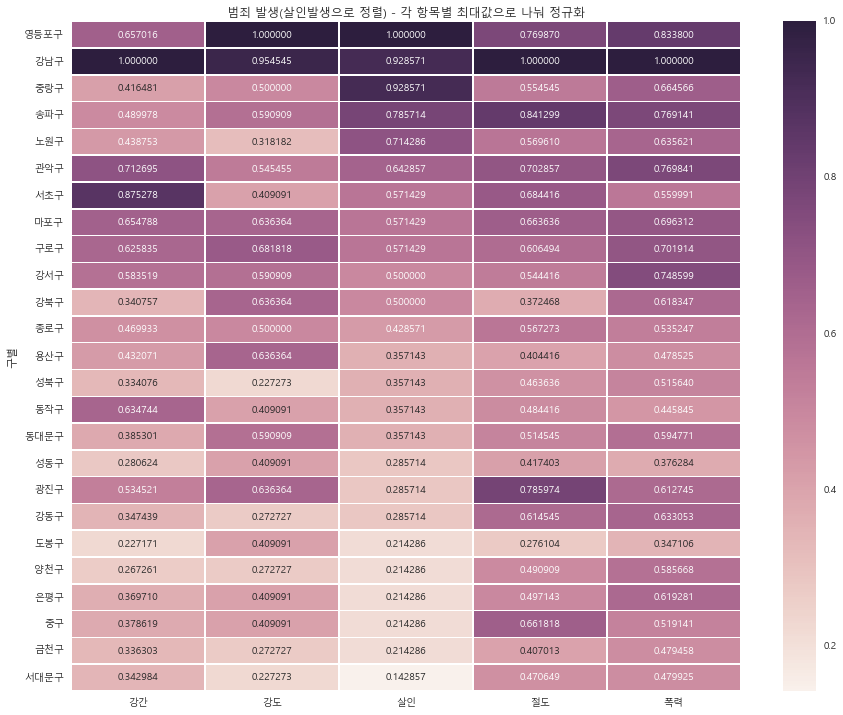

In [34]:
plt.figure(figsize = (15,12))
sns.heatmap(crime_count_norm.sort_values(by='살인', ascending=False), annot=True, fmt='f', linewidths=.5)
plt.title('범죄 발생(살인발생으로 정렬) - 각 항목별 최대값으로 나눠 정규화')

### 인구대비 범죄 비율 

In [35]:
crime_ratio = crime_count_norm.div(guDF['인구수'], axis=0)*100000

In [36]:
crime_ratio.head()

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,0.171892,0.164079,0.159614,0.171892,0.171892
강동구,0.074989,0.058864,0.061667,0.132639,0.136634
강북구,0.101893,0.190285,0.149510,0.111375,0.184898
강서구,0.097957,0.099197,0.083936,0.091392,0.125669
관악구,0.134717,0.103104,0.121516,0.132857,0.145519


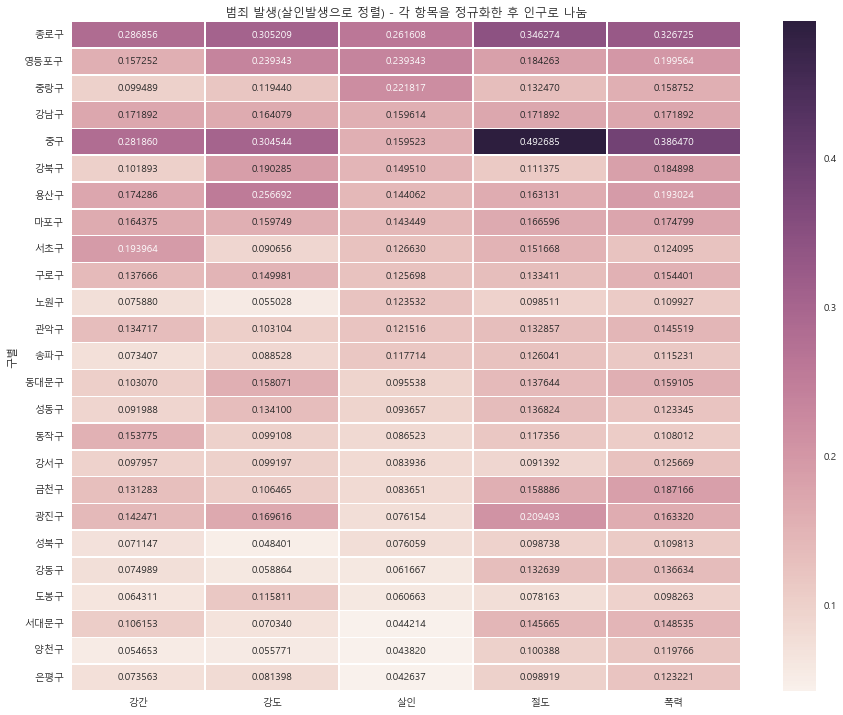

In [37]:
plt.figure(figsize = (15,12))
sns.heatmap(crime_ratio.sort_values(by='살인', ascending=False), annot=True, fmt='f', linewidths=.5)
plt.title('범죄 발생(살인발생으로 정렬) - 각 항목을 정규화한 후 인구로 나눔')

In [38]:
crime_ratio['전체발생비율'] = crime_ratio.mean(axis=1)

In [39]:
crime_ratio.head()

,강간,강도,살인,절도,폭력,전체발생비율
구별,,,,,,
강남구,0.171892,0.164079,0.159614,0.171892,0.171892,0.167874
강동구,0.074989,0.058864,0.061667,0.132639,0.136634,0.092958
강북구,0.101893,0.190285,0.149510,0.111375,0.184898,0.147592
강서구,0.097957,0.099197,0.083936,0.091392,0.125669,0.099630
관악구,0.134717,0.103104,0.121516,0.132857,0.145519,0.127543


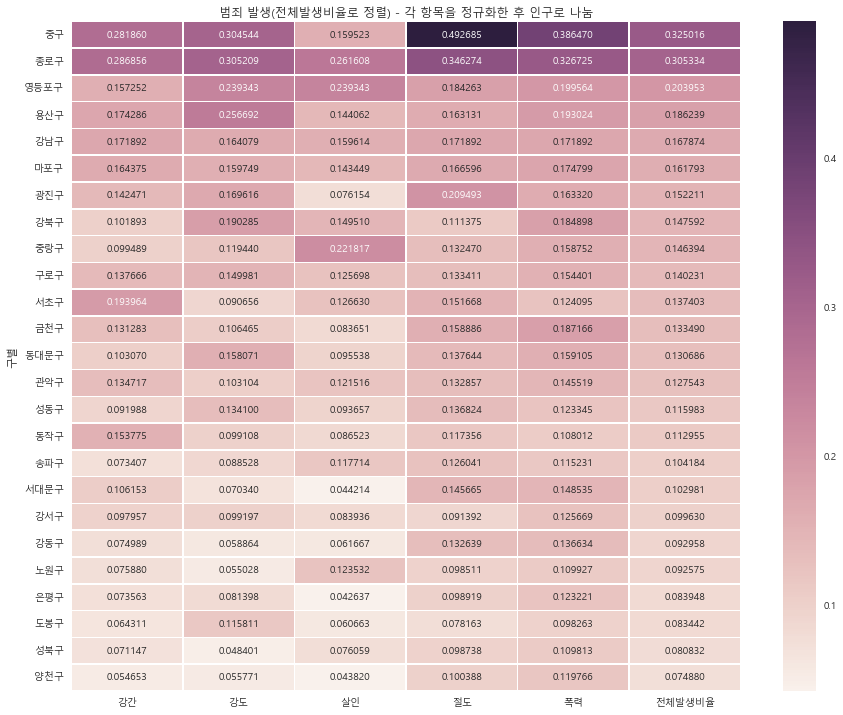

In [40]:
plt.figure(figsize = (15,12))
sns.heatmap(crime_ratio.sort_values(by='전체발생비율', ascending=False), annot=True, fmt='f', linewidths=.5)
plt.title('범죄 발생(전체발생비율로 정렬) - 각 항목을 정규화한 후 인구로 나눔')

## 서울지도로 시각화 

In [41]:
import json 
import folium
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [42]:
geo_path = 'data\skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path,encoding='utf-8'))

In [43]:
geo_str['features'][0]

{'geometry': {'coordinates': [[[127.11519584981606, 37.557533180704915],
    [127.16683184366129, 37.57672487388627],
    [127.18408792330152, 37.55814280369575],
    [127.16530984307447, 37.54221851258693],
    [127.14672806823502, 37.51415680680291],
    [127.12123165719615, 37.52528270089],
    [127.1116764203608, 37.540669955324965],
    [127.11519584981606, 37.557533180704915]]],
  'type': 'Polygon'},
 'id': '강동구',
 'properties': {'base_year': '2013',
  'code': '11250',
  'name': '강동구',
  'name_eng': 'Gangdong-gu'},
 'type': 'Feature'}

### 살인 발생 건수 
 - 강남3구, 영등포구, 중구가 색이 눈에 띈다. 

In [44]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str = geo_str,
               data = guDF['살인'],
               columns = [guDF.index, guDF['살인']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

### 전체 범죄 발생 비율 

In [45]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str = geo_str,
               data = crime_ratio['전체발생비율'],
               columns = [crime_ratio.index, crime_ratio['전체발생비율']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

### 검거율 

In [46]:
guDF.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='구별')

In [47]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str = geo_str,
               data = guDF['검거율'],
               columns = [guDF.index, guDF['검거율']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')
map

## 경찰서위치와 정보를 데이터에 포함시켜 지도에 그리기 

In [48]:
df.head()

,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),구별
0,계,126401,82680,163,156,276,257,5449,5069,55307,21842,65206,55356,NaN
1,중부서,2860,1716,2,2,3,2,105,65,1395,477,1355,1170,중구
2,종로서,2472,1589,3,3,6,5,115,98,1070,413,1278,1070,종로구
3,남대문서,2094,1226,1,0,6,4,65,46,1153,382,869,794,중구
4,서대문서,4029,2579,2,2,5,4,154,124,1812,738,2056,1711,서대문구


In [49]:
df = df.drop(0)

In [50]:
df['관서명']

1      중부서
2      종로서
3     남대문서
4     서대문서
5      혜화서
6      용산서
7      성북서
8     동대문서
9      마포서
10    영등포서
11     성동서
12     동작서
13     광진서
14     서부서
15     강북서
16     금천서
17     중랑서
18     강남서
19     관악서
20     강서서
21     강동서
22     종암서
23     구로서
24     서초서
25     양천서
26     송파서
27     노원서
28     방배서
29     은평서
30     도봉서
31     수서서
Name: 관서명, dtype: object

In [51]:
station_name = []

for name in df['관서명']:
    station_name.append('서울'+str(name[:-1])+'경찰서')

station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [53]:
df['경찰서'] = station_name
df['검거율'] = df['소계(검거)']/df['소계(발생)']*100
df['검거율'] = df['검거율'].round(2)
df.head()

,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),구별,경찰서,검거율
1,중부서,2860,1716,2,2,3,2,105,65,1395,477,1355,1170,중구,서울중부경찰서,60.00
2,종로서,2472,1589,3,3,6,5,115,98,1070,413,1278,1070,종로구,서울종로경찰서,64.28
3,남대문서,2094,1226,1,0,6,4,65,46,1153,382,869,794,중구,서울남대문경찰서,58.55
4,서대문서,4029,2579,2,2,5,4,154,124,1812,738,2056,1711,서대문구,서울서대문경찰서,64.01
5,혜화서,2233,1354,3,2,5,4,96,63,1114,424,1015,861,종로구,서울혜화경찰서,60.64


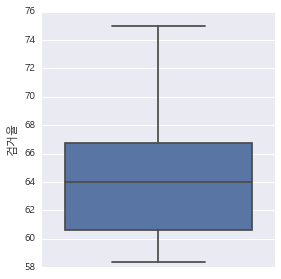

In [54]:
sns.factorplot(y = '검거율',kind='box',data=df) # 범위가 제한적이다. 숫자 차이가 크게 나지 않는다. 

 - 데이터 범위 벌리기 

In [55]:
def reRange(x, oldMin, oldMax, newMin, newMax):
    return (x - oldMin)*(newMax - newMin) / (oldMax - oldMin) + newMin

In [56]:
df['점수'] = reRange(df['검거율'], min(df['검거율']), max(df['검거율']), 1, 100)
df.head()

,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),구별,경찰서,검거율,점수
1,중부서,2860,1716,2,2,3,2,105,65,1395,477,1355,1170,중구,서울중부경찰서,60.00,10.691892
2,종로서,2472,1589,3,3,6,5,115,98,1070,413,1278,1070,종로구,서울종로경찰서,64.28,36.140541
3,남대문서,2094,1226,1,0,6,4,65,46,1153,382,869,794,중구,서울남대문경찰서,58.55,2.070270
4,서대문서,4029,2579,2,2,5,4,154,124,1812,738,2056,1711,서대문구,서울서대문경찰서,64.01,34.535135
5,혜화서,2233,1354,3,2,5,4,96,63,1114,424,1015,861,종로구,서울혜화경찰서,60.64,14.497297


In [57]:
df = df.sort_values(by='점수', ascending=False)

In [58]:
df.head()

,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),구별,경찰서,검거율,점수
20,강서서,5585,4190,7,8,13,13,262,191,2096,1260,3207,2718,강서구,서울강서경찰서,75.02,100.000000
16,금천서,3781,2796,3,4,6,6,151,122,1567,888,2054,1776,금천구,서울금천경찰서,73.95,93.637838
15,강북서,4257,3113,7,8,14,13,153,126,1434,618,2649,2348,강북구,서울강북경찰서,73.13,88.762162
30,도봉서,2664,1900,3,3,9,10,102,106,1063,478,1487,1303,도봉구,서울도봉경찰서,71.32,78.000000
31,수서서,3423,2362,10,7,6,6,149,124,1439,666,1819,1559,강남구,서울수서경찰서,69.00,64.205405


### 구글지도로 위도 경도 가지고 오기 
 - http://pinkwink.kr/952 참고 

In [61]:
import googlemaps

In [63]:
gmaps = googlemaps.Client(key='') # key는 구글에서 https://developers.google.com/maps/web/?hl=ko

In [64]:
lat = []
lng = []

for name in df['경찰서']:
    tmpMap = gmaps.geocode(name)
    tmpLoc = tmpMap[0].get('geometry')
    lat.append(tmpLoc['location']['lat'])
    lng.append(tmpLoc['location']['lng'])

In [65]:
df['lat'] = lat
df['lng'] = lng
df[['경찰서','lat','lng']].head()

,경찰서,lat,lng
20,서울강서경찰서,37.539783,126.829997
16,서울금천경찰서,37.481405,126.909951
15,서울강북경찰서,37.637388,127.027324
30,서울도봉경찰서,37.653359,127.052682
31,서울수서경찰서,37.493490,127.077212


In [66]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in df.index:
    folium.CircleMarker([df['lat'][n], df['lng'][n]], radius=df['점수'][n]/2, 
                        color='#3186cc', fill_color='#3186cc').add_to(map)
    
map

In [67]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_str = geo_str,
               data = crime_ratio['전체발생비율'],
               columns = [crime_ratio.index, crime_ratio['전체발생비율']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

for n in df.index:
    folium.CircleMarker([df['lat'][n], df['lng'][n]], radius=df['점수'][n]/2, 
                        color='#3186cc', fill_color='#3186cc').add_to(map)
    
map